# Back translation

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from collections import defaultdict

from mutalyzer_backtranslate import BackTranslate
from mutalyzer_backtranslate.util import protein_letters

Create a reverse translation class instance.

In [3]:
bt = BackTranslate()

For each pair of amino acids, calculate the number of one-nucleotide substitutions that transform one amino acid into the other.

In [4]:
table = []
for i in protein_letters:
    table.append([])
    for j in protein_letters:
        s = bt.without_dna(i, j)
        table[-1].append(int(sum(list(map(len, s.values())))))

Visualise the resutling matrix.

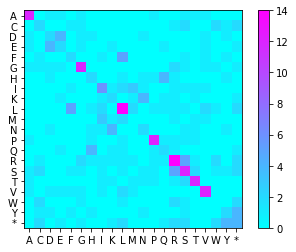

In [5]:
imshow(table, interpolation='nearest')
xticks(range(21), protein_letters)
yticks(range(21), protein_letters)
set_cmap('cool')
colorbar();

Visualise the distribution of values in the matrix.

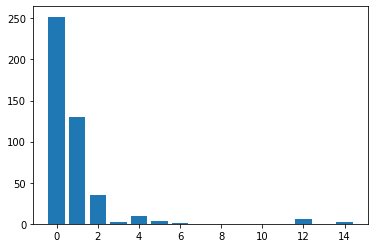

In [6]:
d = defaultdict(int)

for row in table:
    for element in row:
        d[element] += 1

ind = sorted(d.keys())
values = []
for i in ind:
     values.append(d[i])
        
bar(ind, values);

Print some summaries.

In [7]:
total = 21 ** 2
total_p = total / 100
imperfect = sum(values[2:])

print('\n{} substitutions in total.'.format(total))
print('{:3} impossible substitutions ({:.2f}%).'.format(values[0], values[0] / total_p))
print('{:3} perfect substitutions ({:.2f}%).'.format(values[1], values[1] / total_p))
print('{:3} imperfect substitutions ({:.2f}%).'.format(imperfect, imperfect / total_p))

possible = sum(values[1:])
possible_p = possible / 100
print('\n{:3} possible substitutions, of which {:.2f}% is perfect and {:.2f}% is imperfect.'.format(
    possible, values[1] / possible_p, imperfect / possible_p))


441 substitutions in total.
252 impossible substitutions (57.14%).
130 perfect substitutions (29.48%).
 59 imperfect substitutions (13.38%).

189 possible substitutions, of which 68.78% is perfect and 31.22% is imperfect.
